# Final Project - Raf Antwerpen - December 8th 2020

## Import libraries and initialize Google Drive

In [498]:
import pandas as pd
import numpy as np
import xarray as xr
import hvplot.xarray
import cartopy
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10,10)
import fsspec
import gdrivefs
from skimage import measure
import datetime
from sklearn.linear_model import LinearRegression

In [ ]:
# ! pip install fsspec==0.8.4
# ! pip install 'git+git://github.com/tjcrone/gdrivefs.git@540a55fae06cbed4f7d9f8d540ac29fcb640c38a'

In [4]:
gdfid = '1hzH32KcsdMtNX0f9_WkMTCyf20tj6ZLk'
gdfs = gdrivefs.GoogleDriveFileSystem(root_file_id = gdfid, token = 'cache')

In [669]:
files = gdfs.ls('/')

## Download data in NetCDF files from Google Drive. Data is output from a regional climate model (MAR). MAR models the evolution of and atmosphere over the Greenland Ice Sheet (GrIS). Data consists of 11 files, one for each year from 2000 to 2010, containing daily output of 89 variables. The data for all years are appended into one Xarray DataArray called 'ds'.

In [6]:
ofs = []
for file in files[1:]: # only include NetCDF files in files
    ofs.append(gdfs.open(file))

ds = xr.open_mfdataset(ofs)
ds

<xarray.Dataset>
Dimensions:         (ATMLAY: 3, ATMLAY3_3: 1, OUTLAY: 18, OUTLAY1_1: 1, PLEV: 7, SECTOR: 2, SECTOR1_1: 1, TIME: 4018, X12_84: 73, Y21_155: 135, ZTQLEV: 4, ZUVLEV: 3, bnds: 2)
Coordinates:
  * Y21_155         (Y21_155) float32 -1180.0 -1160.0 -1140.0 ... 1480.0 1500.0
  * ATMLAY3_3       (ATMLAY3_3) float32 0.99974793
  * PLEV            (PLEV) float32 200.0 500.0 600.0 700.0 800.0 850.0 925.0
  * SECTOR          (SECTOR) float32 1.0 2.0
  * ZUVLEV          (ZUVLEV) float32 10.0 50.0 100.0
  * ZTQLEV          (ZTQLEV) float32 2.0 10.0 50.0 100.0
  * OUTLAY1_1       (OUTLAY1_1) float32 0.0
  * SECTOR1_1       (SECTOR1_1) float32 1.0
  * ATMLAY          (ATMLAY) float32 0.99899215 0.99937004 0.99974793
  * X12_84          (X12_84) float32 -760.0 -740.0 -720.0 ... 640.0 660.0 680.0
  * OUTLAY          (OUTLAY) float32 0.0 0.05 0.1 0.2 0.3 ... 7.5 10.0 15.0 20.0
  * TIME            (TIME) datetime64[ns] 2000-01-01T12:00:00 ... 2010-12-31T...
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds       (TIME, bnds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    DATE            (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    YYYY            (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    MM              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    DD              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    HH              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    MIN             (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    LON             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    LAT             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SH              (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SRF             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SOL             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SLO             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    CZ              (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SAL             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    VEG             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    MSK             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    FRV             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    FRA             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    SHSN0           (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SHSN2           (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SHSN3           (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    ZN4             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    ZN5             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    ZN6             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SMB             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    SU              (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    ME              (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    RZ              (

#### Define latitude and longitude extents for map plots

In [7]:
extent = [-55,-25,58,84]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

#### Omit cells where the ice fraction is smaller than 50% and initialize lat and lon

In [8]:
ds_MSK = ds.where(ds.MSK >= 50)
lat = ds.LAT[0,:,:]
lon = ds.LON[0,:,:]

#### Only include the Greenland ice sheet, not Canada

In [666]:
blobs = ds.MSK[0,:,:] > 50
all_labels = measure.label(blobs)
GrIS_label = all_labels * 1.0
GrIS_label[GrIS_label == 0] = np.nan
GrIS_label[GrIS_label > 1] = np.nan

#### Plot ice sheet area

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


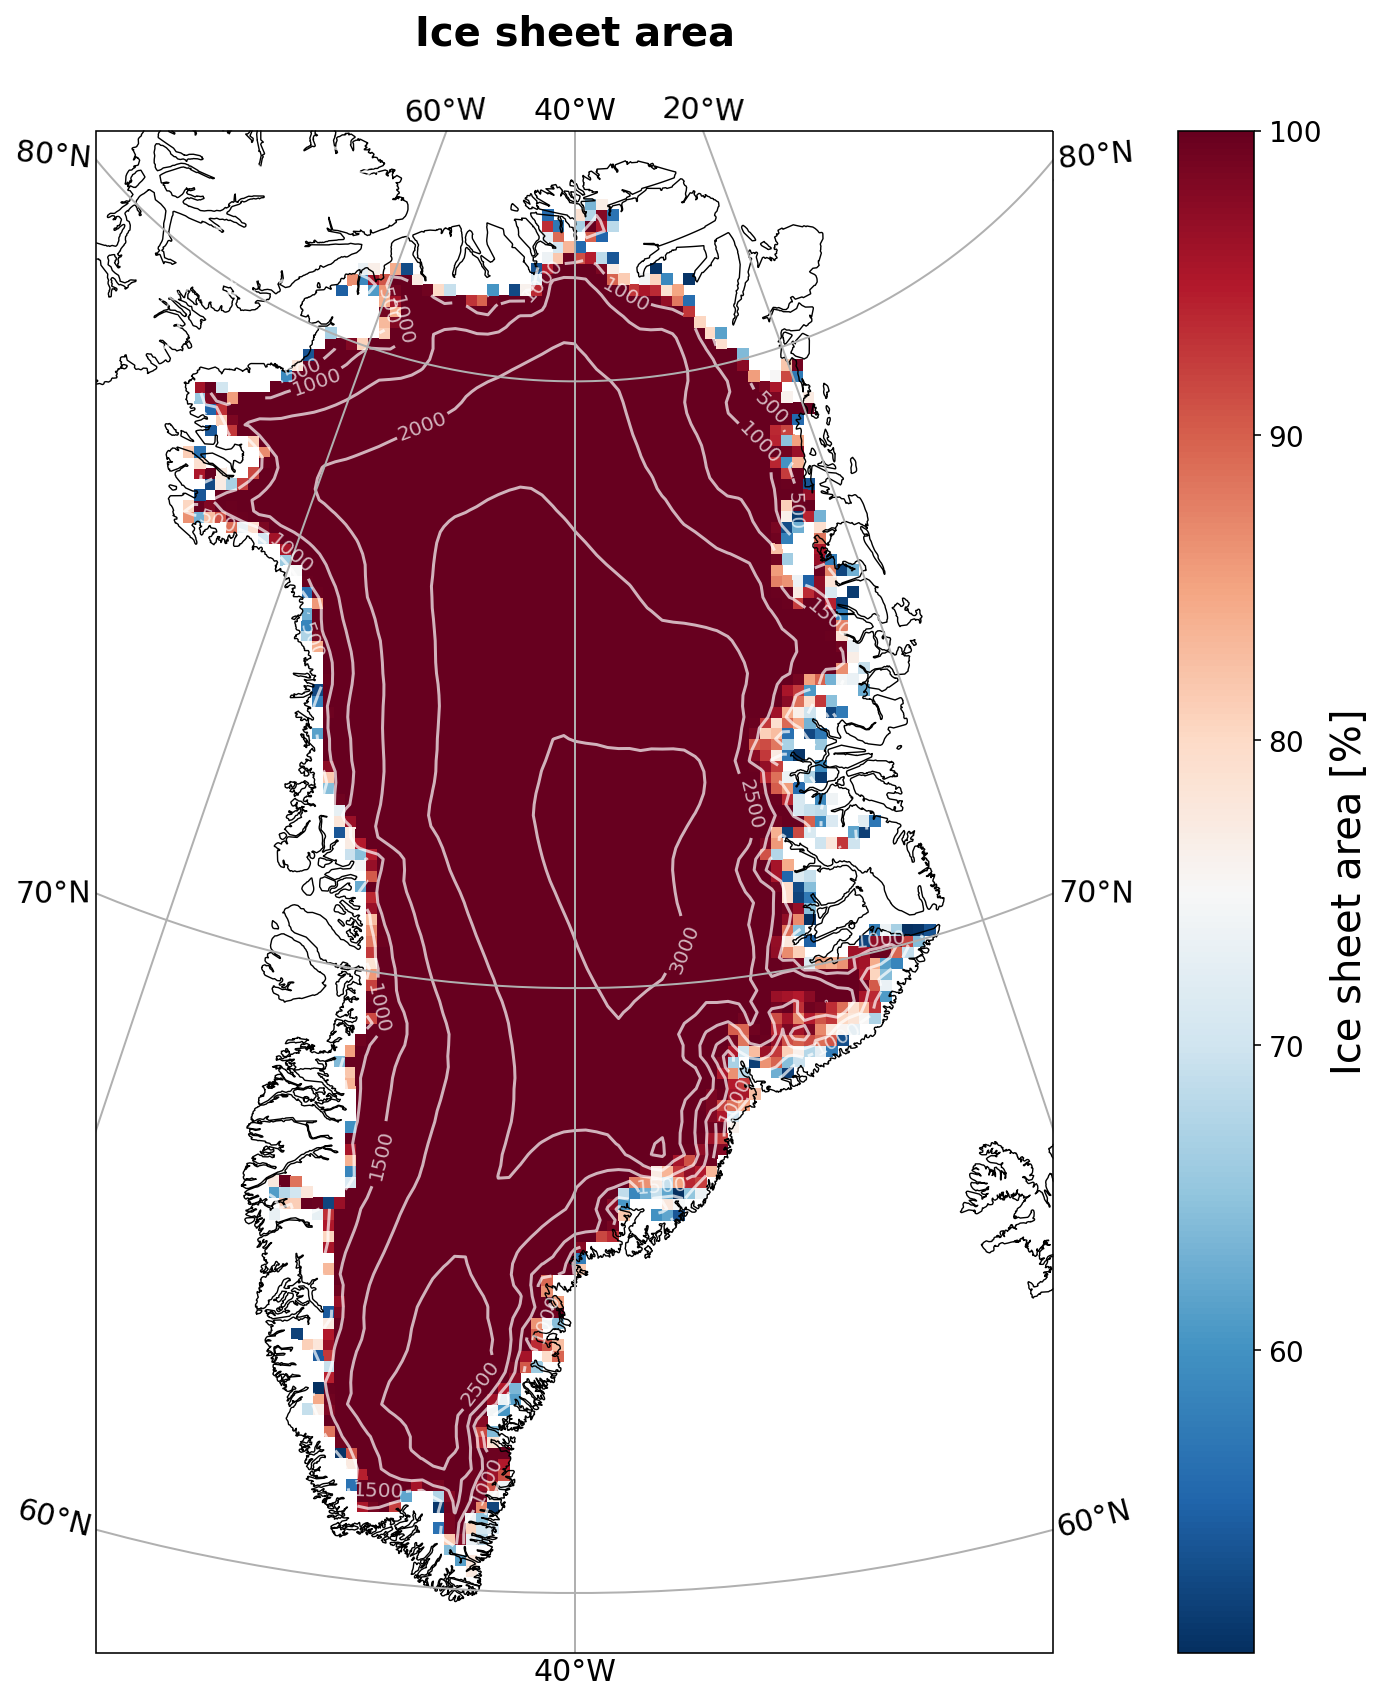

In [668]:
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection = ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.coastlines(resolution = '10m', linewidth=0.7)
c = ax.pcolor(lon, lat, ds_MSK.MSK[0,:,:] * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r')
cbar = fig.colorbar(c, ax=ax, pad = 0.08)
cbar.set_label('Ice sheet area [%]', fontsize=20)
cbar.ax.tick_params(labelsize=14)
cc = ax.contour(lon, lat, ds_MSK.SH[0,:,:], transform=ccrs.PlateCarree(), colors='w', alpha=0.7)
cc.levels = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500]
fmt = r'%.0f'
ax.clabel(cc, cc.levels, inline=True, fmt=fmt, fontsize=10)

gl = ax.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl.xlocator = mticker.FixedLocator([-60, -40, -20])
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylocator = mticker.FixedLocator([60, 70, 80])
gl.ylabel_style = {'size': 15, 'color': 'black'}
plt.title('Ice sheet area', weight='bold', fontsize=20, pad=25);

#### Create array with ablation zone height threshold. Ablation zone is below 1624m

In [674]:
SH = ds_MSK.SH[0,:,:]
SH = np.where(SH > 1624, 0, SH)
SH = np.where(SH != 0, 1, SH)

#### Include only cells with snow pack height of 0 m and apply ablation zone height threshold

In [13]:
SHSN2 = (ds_MSK.SHSN2[:,0,:,:] * GrIS_label)
SHSN2 = np.where(SHSN2 == 0, -1, SHSN2)
SHSN2 = np.where(SHSN2 > -1, 0, SHSN2)
SHSN2 = np.where(SHSN2 == -1, 1, SHSN2)
SHSN2_SH = SHSN2 * SH

#### Include only cells with density of snow/ice at the surface between 920 and 925 kg/m3. This ensures that firn, snow and water are omitted

In [14]:
RO1 = (ds_MSK.RO1[:,0,:,:] * GrIS_label)
RO1 = np.where(RO1 < 920, 0, RO1)
RO1 = np.where(RO1 > 925, 0, RO1)
RO1 = np.where(RO1 != 0, 1, RO1)
RO1_SH = RO1 * SH

#### Combine both snow pack height and density conditions to create an array 's' that contains only bare ice cells. Bare ice is exposed when the overlying snow melts in summer. The array 's' contains the daily bare ice extent for 2000-2010

In [15]:
s = SHSN2_SH * RO1_SH

#### Create an array that denotes the slice for January 1st for every year

In [17]:
yearlist = np.array([0,366,731,1096,1461,1827,2192,2557,2922,3288,3653,4018])

#### Determine annual maximum bare ice extent. Annual maximum bare ice extent is defined as those cells that are determined to be bare ice for at least 10 days per year. This threshold ensures that any erroneous detections of supraglacial lakes as bare ice are omitted

In [285]:
bi = np.zeros((11,ds_MSK.MSK.shape[1], ds_MSK.MSK.shape[2]))
for year in range(11):
    bi[year,:,:] = np.nansum(s[np.arange(yearlist[year],yearlist[year+1]),:,:], axis=0)

bi = np.where(bi < 10, 0, bi)

#### Turn 0's into NaN's

In [20]:
bi_plot = np.where(bi == 0, np.nan, bi)

#### Plot maximum bare ice extent for 2010

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


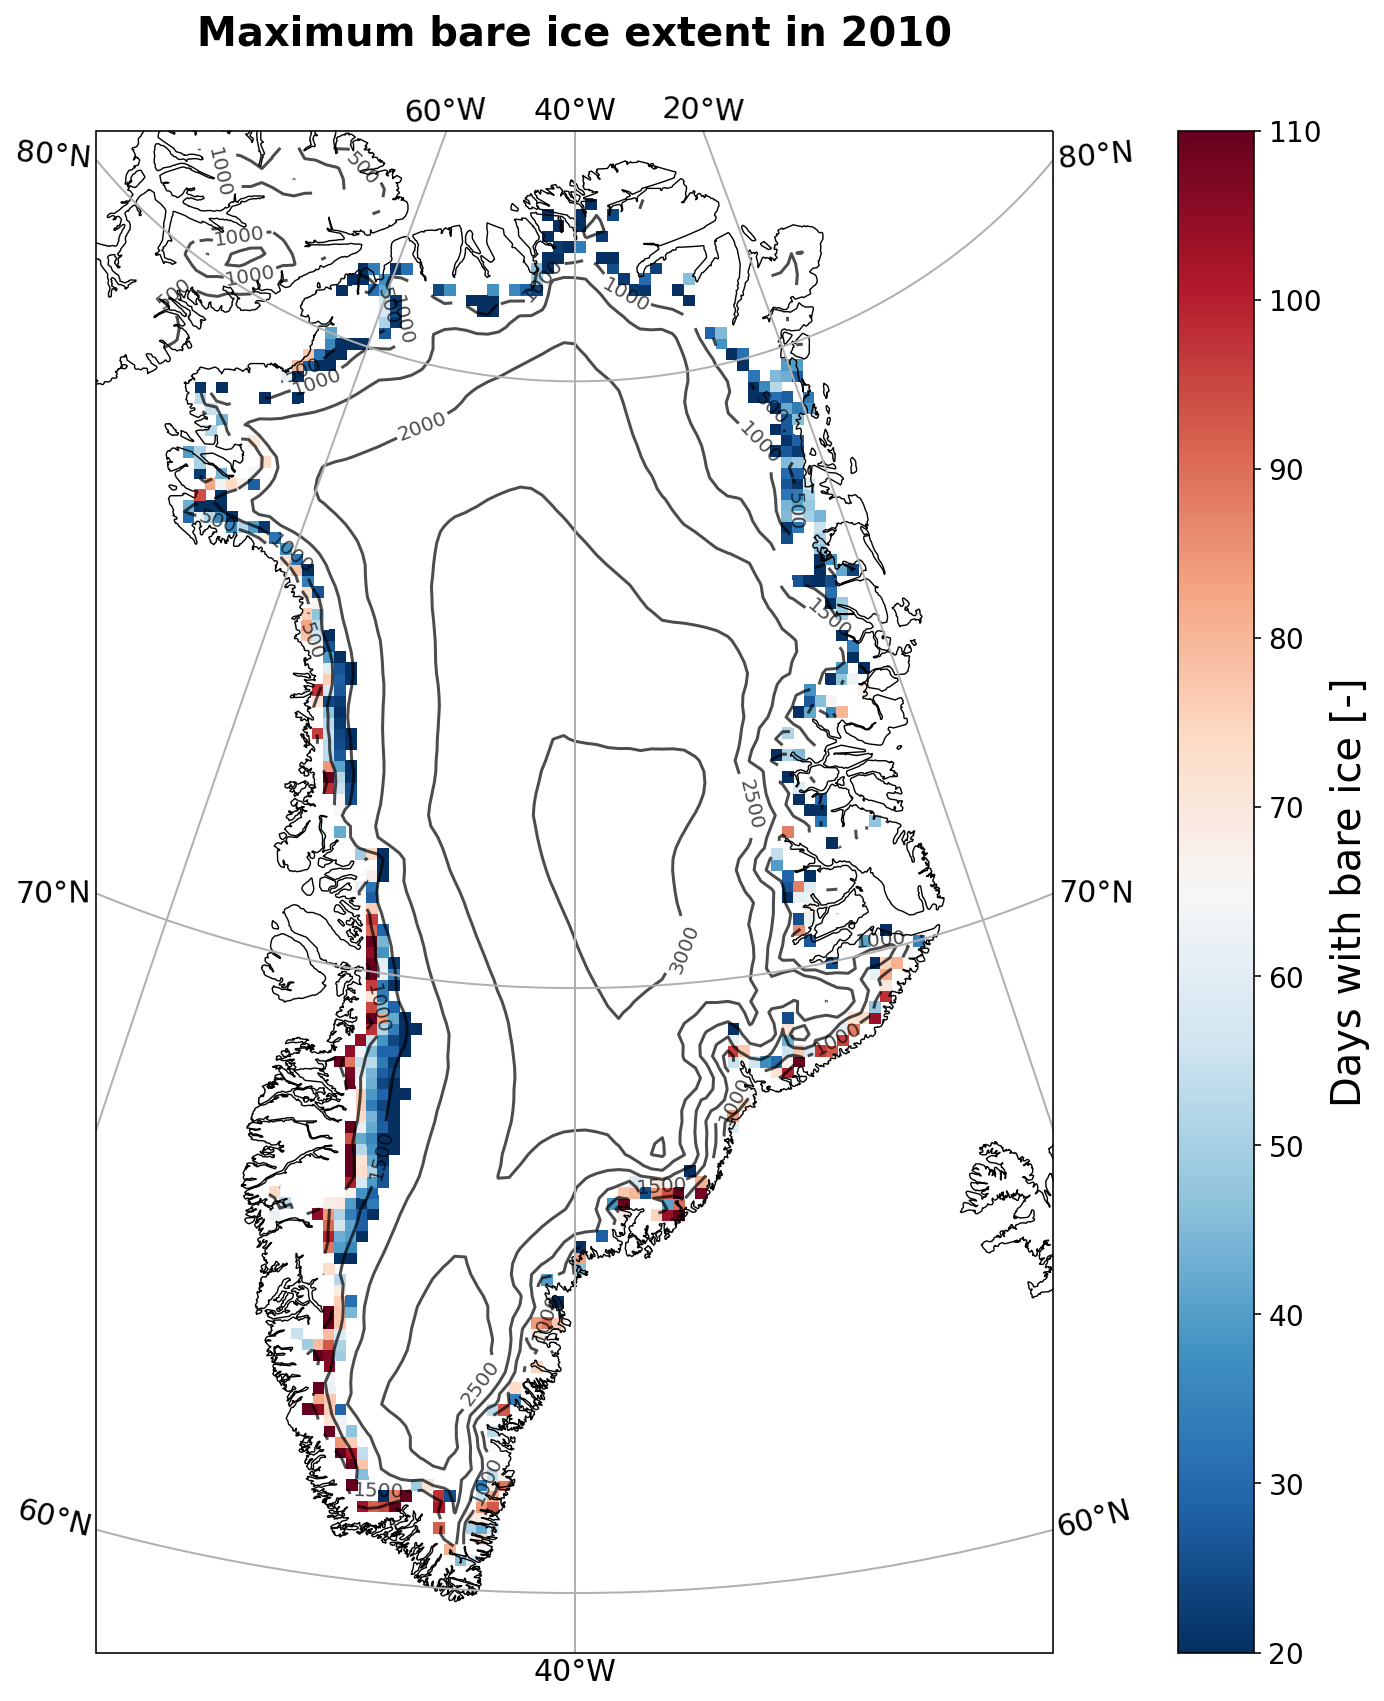

In [679]:
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection = ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.coastlines(resolution = '10m', linewidth=0.7)
c = ax.pcolor(lon, lat, bi_plot[10,:,:], transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=20, vmax=110)
cbar = fig.colorbar(c, ax=ax, pad = 0.08)
cbar.set_label('Days with bare ice [-]', fontsize=20)
cbar.ax.tick_params(labelsize=14)
cc = ax.contour(lon, lat, ds_MSK.SH[0,:,:], transform=ccrs.PlateCarree(), colors='k', alpha=0.7)
cc.levels = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500]
fmt = r'%.0f'
ax.clabel(cc, cc.levels, inline=True, fmt=fmt, fontsize=10)

gl = ax.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl.xlocator = mticker.FixedLocator([-60, -40, -20])
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylocator = mticker.FixedLocator([60, 70, 80])
gl.ylabel_style = {'size': 15, 'color': 'black'}
plt.title('Maximum bare ice extent in 2010', weight='bold', fontsize=20, pad=25);

#### Determine maximum bare ice area over 2000-2010. All cells in 2000-2010 during which bare ice has been exposed for more than 10 days per year.

In [681]:
bi_area = np.sum(bi, axis=0)
bi_area = np.where(bi_area > 0, 1, bi_area)
bi_area = np.where(bi_area == 0, np.nan, bi_area)

# Clouds

#### Plot average cloud cover (total, up, middle and down) over the GrIS

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gour

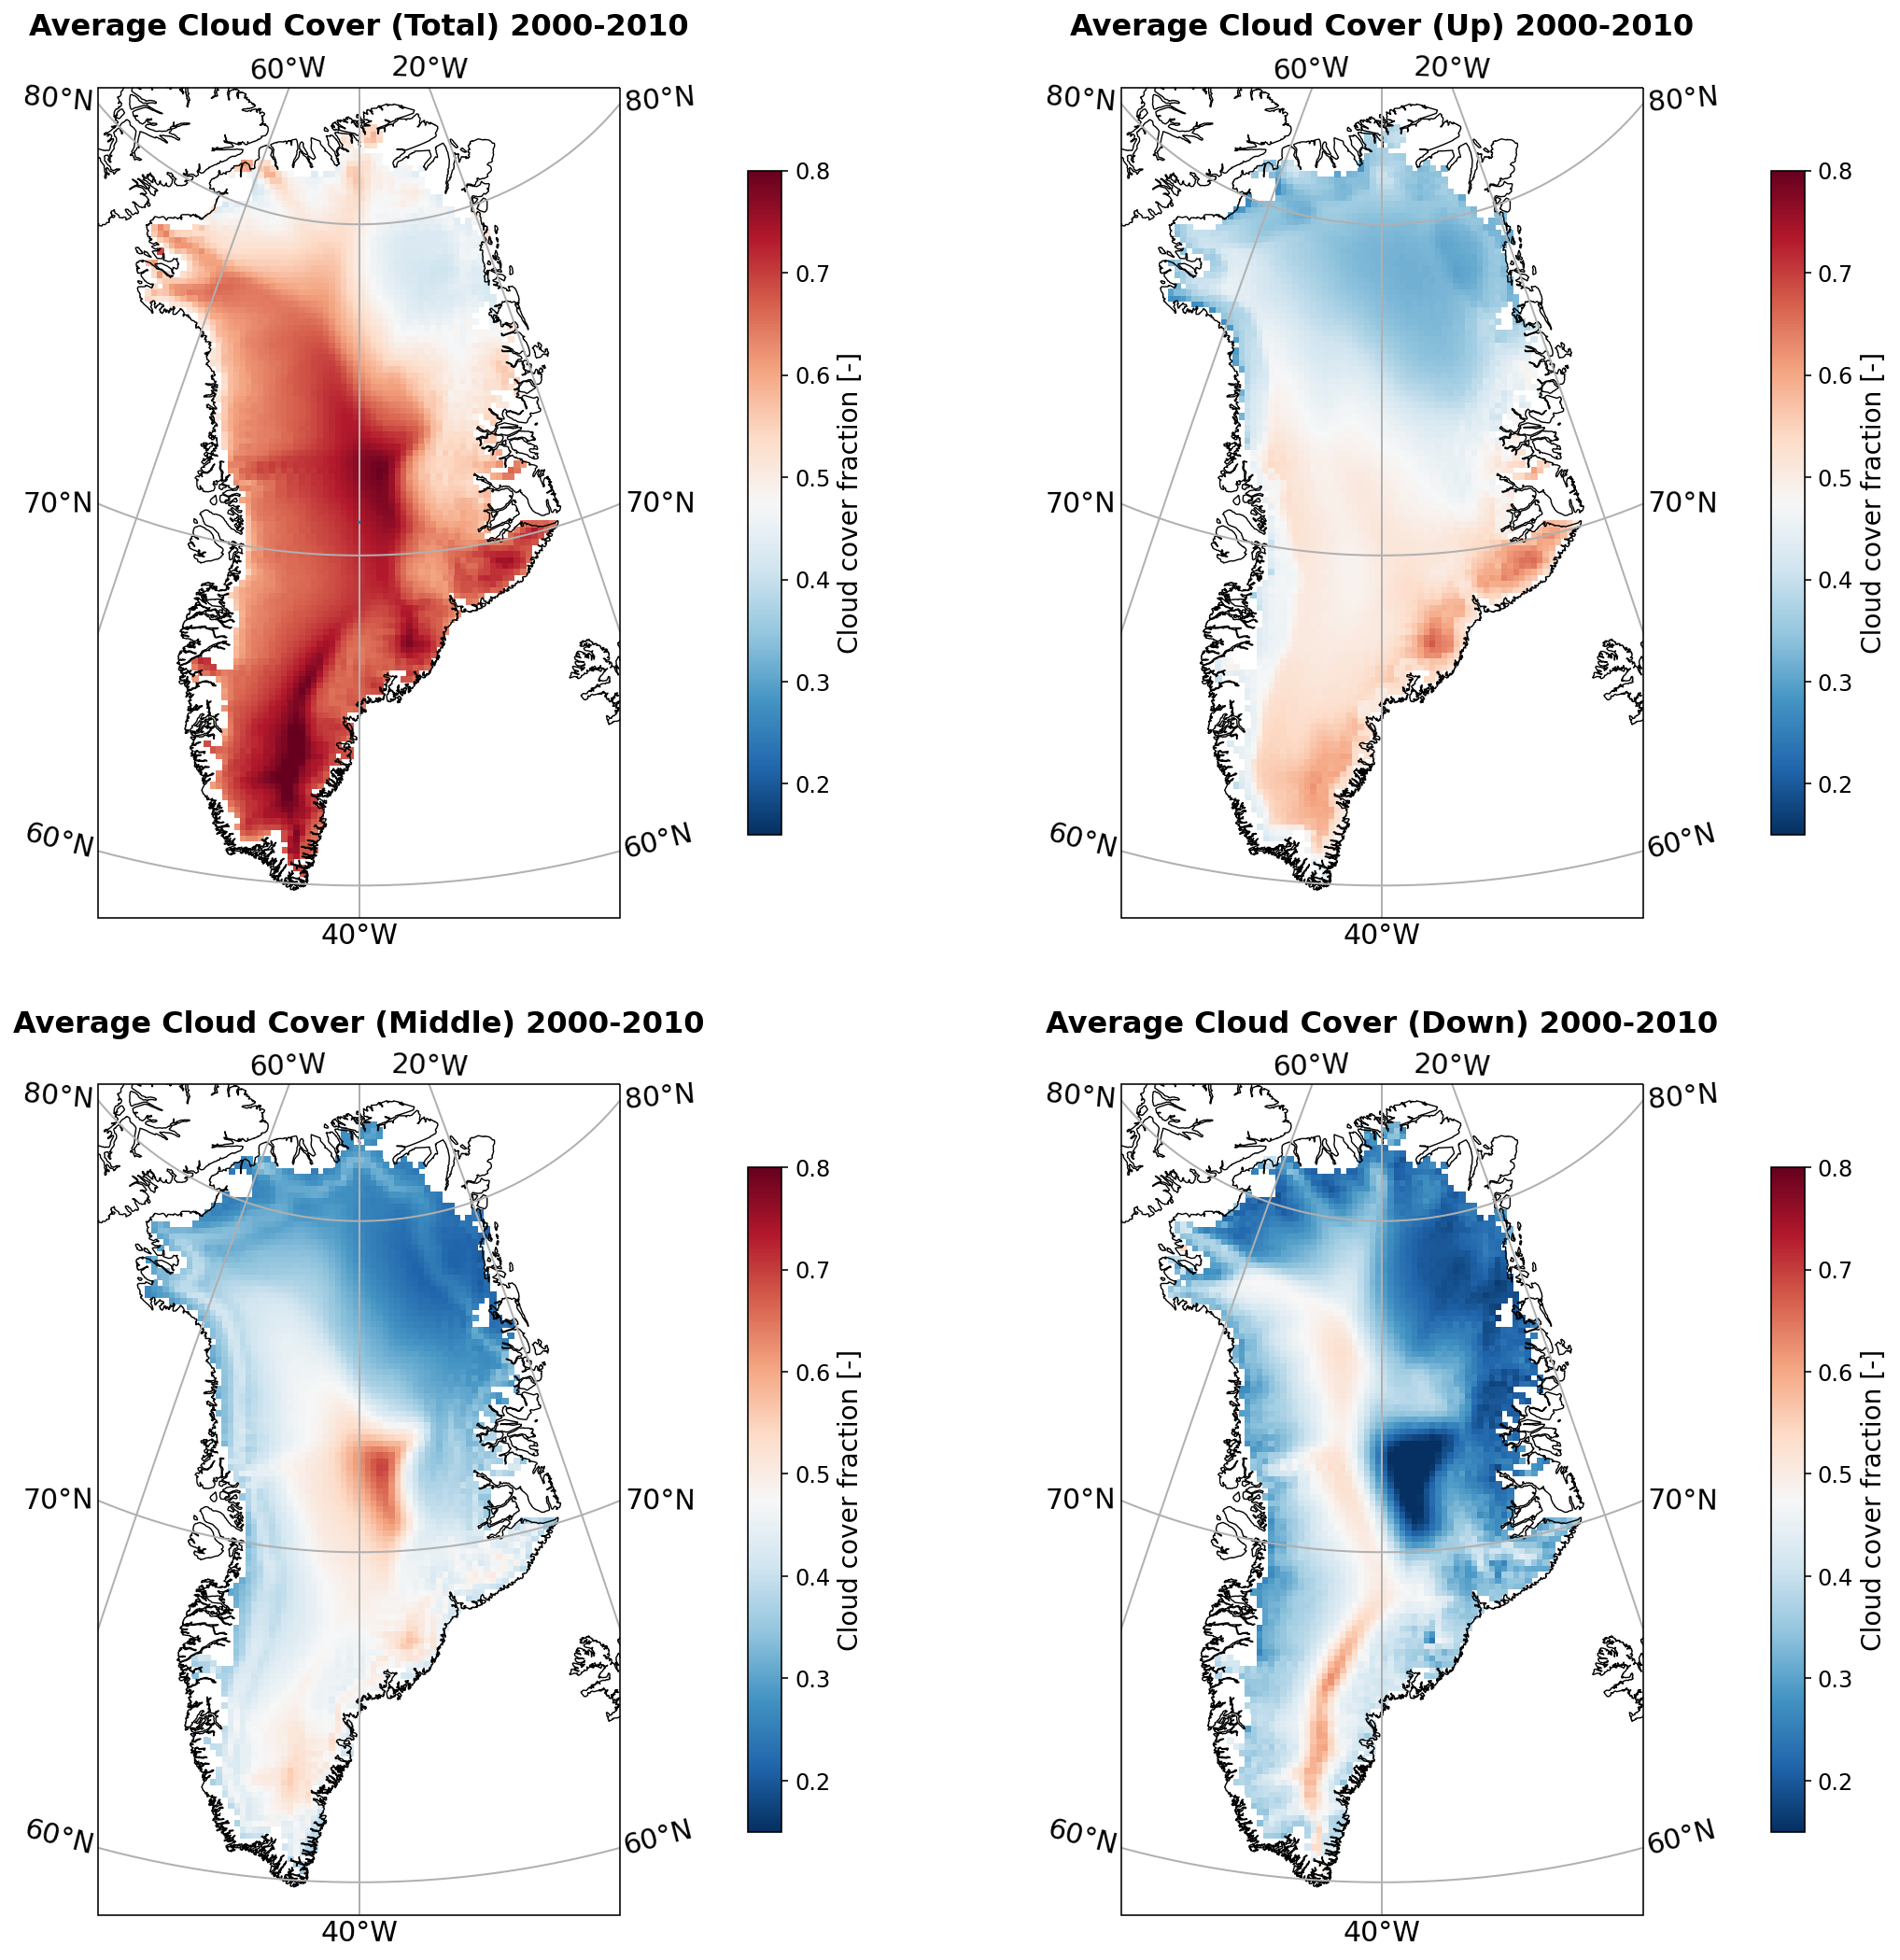

In [462]:
fig = plt.figure(figsize=(18,18))

ax0 = fig.add_subplot(221, projection = ccrs.Orthographic(central_lon, central_lat))
ax0.plot(np.random.rand(10))
ax0.set_extent(extent)
ax0.coastlines(resolution = '10m', linewidth=0.7)
p0 = ax0.pcolor(lon, lat, np.nanmean(ds_MSK.CC, axis=0) * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=0.15, vmax=0.8)
gl0 = ax0.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl0.xlocator = mticker.FixedLocator([-60, -40, -20])
gl0.xlabel_style = {'size': 15, 'color': 'black'}
gl0.ylocator = mticker.FixedLocator([60, 70, 80])
gl0.ylabel_style = {'size': 15, 'color': 'black'}
ax0.set_title('Average Cloud Cover (Total) 2000-2010', weight='bold', fontsize=16, pad=10);
cbar0 = fig.colorbar(p0, ax=ax0, pad = 0.15, shrink=0.8)
cbar0.set_label('Cloud cover fraction [-]', fontsize=14)
cbar0.ax.tick_params(labelsize=12)

ax1 = fig.add_subplot(222, projection = ccrs.Orthographic(central_lon, central_lat))
ax1.set_extent(extent)
ax1.coastlines(resolution = '10m', linewidth=0.7)
p1 = ax1.pcolor(lon, lat, np.nanmean(ds_MSK.CU, axis=0) * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=0.15, vmax=0.8)
gl1 = ax1.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl1.xlocator = mticker.FixedLocator([-60, -40, -20])
gl1.xlabel_style = {'size': 15, 'color': 'black'}
gl1.ylocator = mticker.FixedLocator([60, 70, 80])
gl1.ylabel_style = {'size': 15, 'color': 'black'}
ax1.set_title('Average Cloud Cover (Up) 2000-2010', weight='bold', fontsize=16, pad=10);
cbar1 = fig.colorbar(p1, ax=ax1, pad = 0.15, shrink=0.8)
cbar1.set_label('Cloud cover fraction [-]', fontsize=14)
cbar1.ax.tick_params(labelsize=12)

ax2 = fig.add_subplot(223, projection = ccrs.Orthographic(central_lon, central_lat))
ax2.set_extent(extent)
ax2.coastlines(resolution = '10m', linewidth=0.7)
p2 = ax2.pcolor(lon, lat, np.nanmean(ds_MSK.CM, axis=0) * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=0.15, vmax=0.8)
gl2 = ax2.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl2.xlocator = mticker.FixedLocator([-60, -40, -20])
gl2.xlabel_style = {'size': 15, 'color': 'black'}
gl2.ylocator = mticker.FixedLocator([60, 70, 80])
gl2.ylabel_style = {'size': 15, 'color': 'black'}
ax2.set_title('Average Cloud Cover (Middle) 2000-2010', weight='bold', fontsize=16, pad=10);
cbar2 = fig.colorbar(p2, ax=ax2, pad = 0.15, shrink=0.8)
cbar2.set_label('Cloud cover fraction [-]', fontsize=14)
cbar2.ax.tick_params(labelsize=12)

ax3 = fig.add_subplot(224, projection = ccrs.Orthographic(central_lon, central_lat))
ax3.set_extent(extent)
ax3.coastlines(resolution = '10m', linewidth=0.7)
p3 = ax3.pcolor(lon, lat, np.nanmean(ds_MSK.CD, axis=0) * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=0.15, vmax=0.8)
gl3 = ax3.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl3.xlocator = mticker.FixedLocator([-60, -40, -20])
gl3.xlabel_style = {'size': 15, 'color': 'black'}
gl3.ylocator = mticker.FixedLocator([60, 70, 80])
gl3.ylabel_style = {'size': 15, 'color': 'black'}
ax3.set_title('Average Cloud Cover (Down) 2000-2010', weight='bold', fontsize=16, pad=10);
cbar3 = fig.colorbar(p3, ax=ax3, pad = 0.15, shrink=0.8)
cbar3.set_label('Cloud cover fraction [-]', fontsize=14)
cbar3.ax.tick_params(labelsize=12)

# Annual means

#### Determine annual mean of cloud cover (total, up, middle and down) over the GrIS

In [76]:
ds_CC_am = (ds_MSK.CC * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CU_am = (ds_MSK.CU * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CM_am = (ds_MSK.CM * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CD_am = (ds_MSK.CD * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])

#### Determine annual mean of cloud cover (total, up, middle and down) over the bare ice extent

In [77]:
ds_CC_ambi = (ds_MSK.CC * GrIS_label * bi_area).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CU_ambi = (ds_MSK.CU * GrIS_label * bi_area).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CM_ambi = (ds_MSK.CM * GrIS_label * bi_area).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CD_ambi = (ds_MSK.CD * GrIS_label * bi_area).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])

#### Create array of annual maximum bare ice extent per year in terms of 1's and 0's

In [128]:
bi_area_y = np.where(bi > 0, 1, bi_plot)
bi_area_y = np.where(bi_area_y == 0, np.nan, bi_area_y)

#### Plot annual means of cloud cover (total, up, middle and down) over the GrIS and over the bare ice extent. Also plot annual maximum bare ice extent

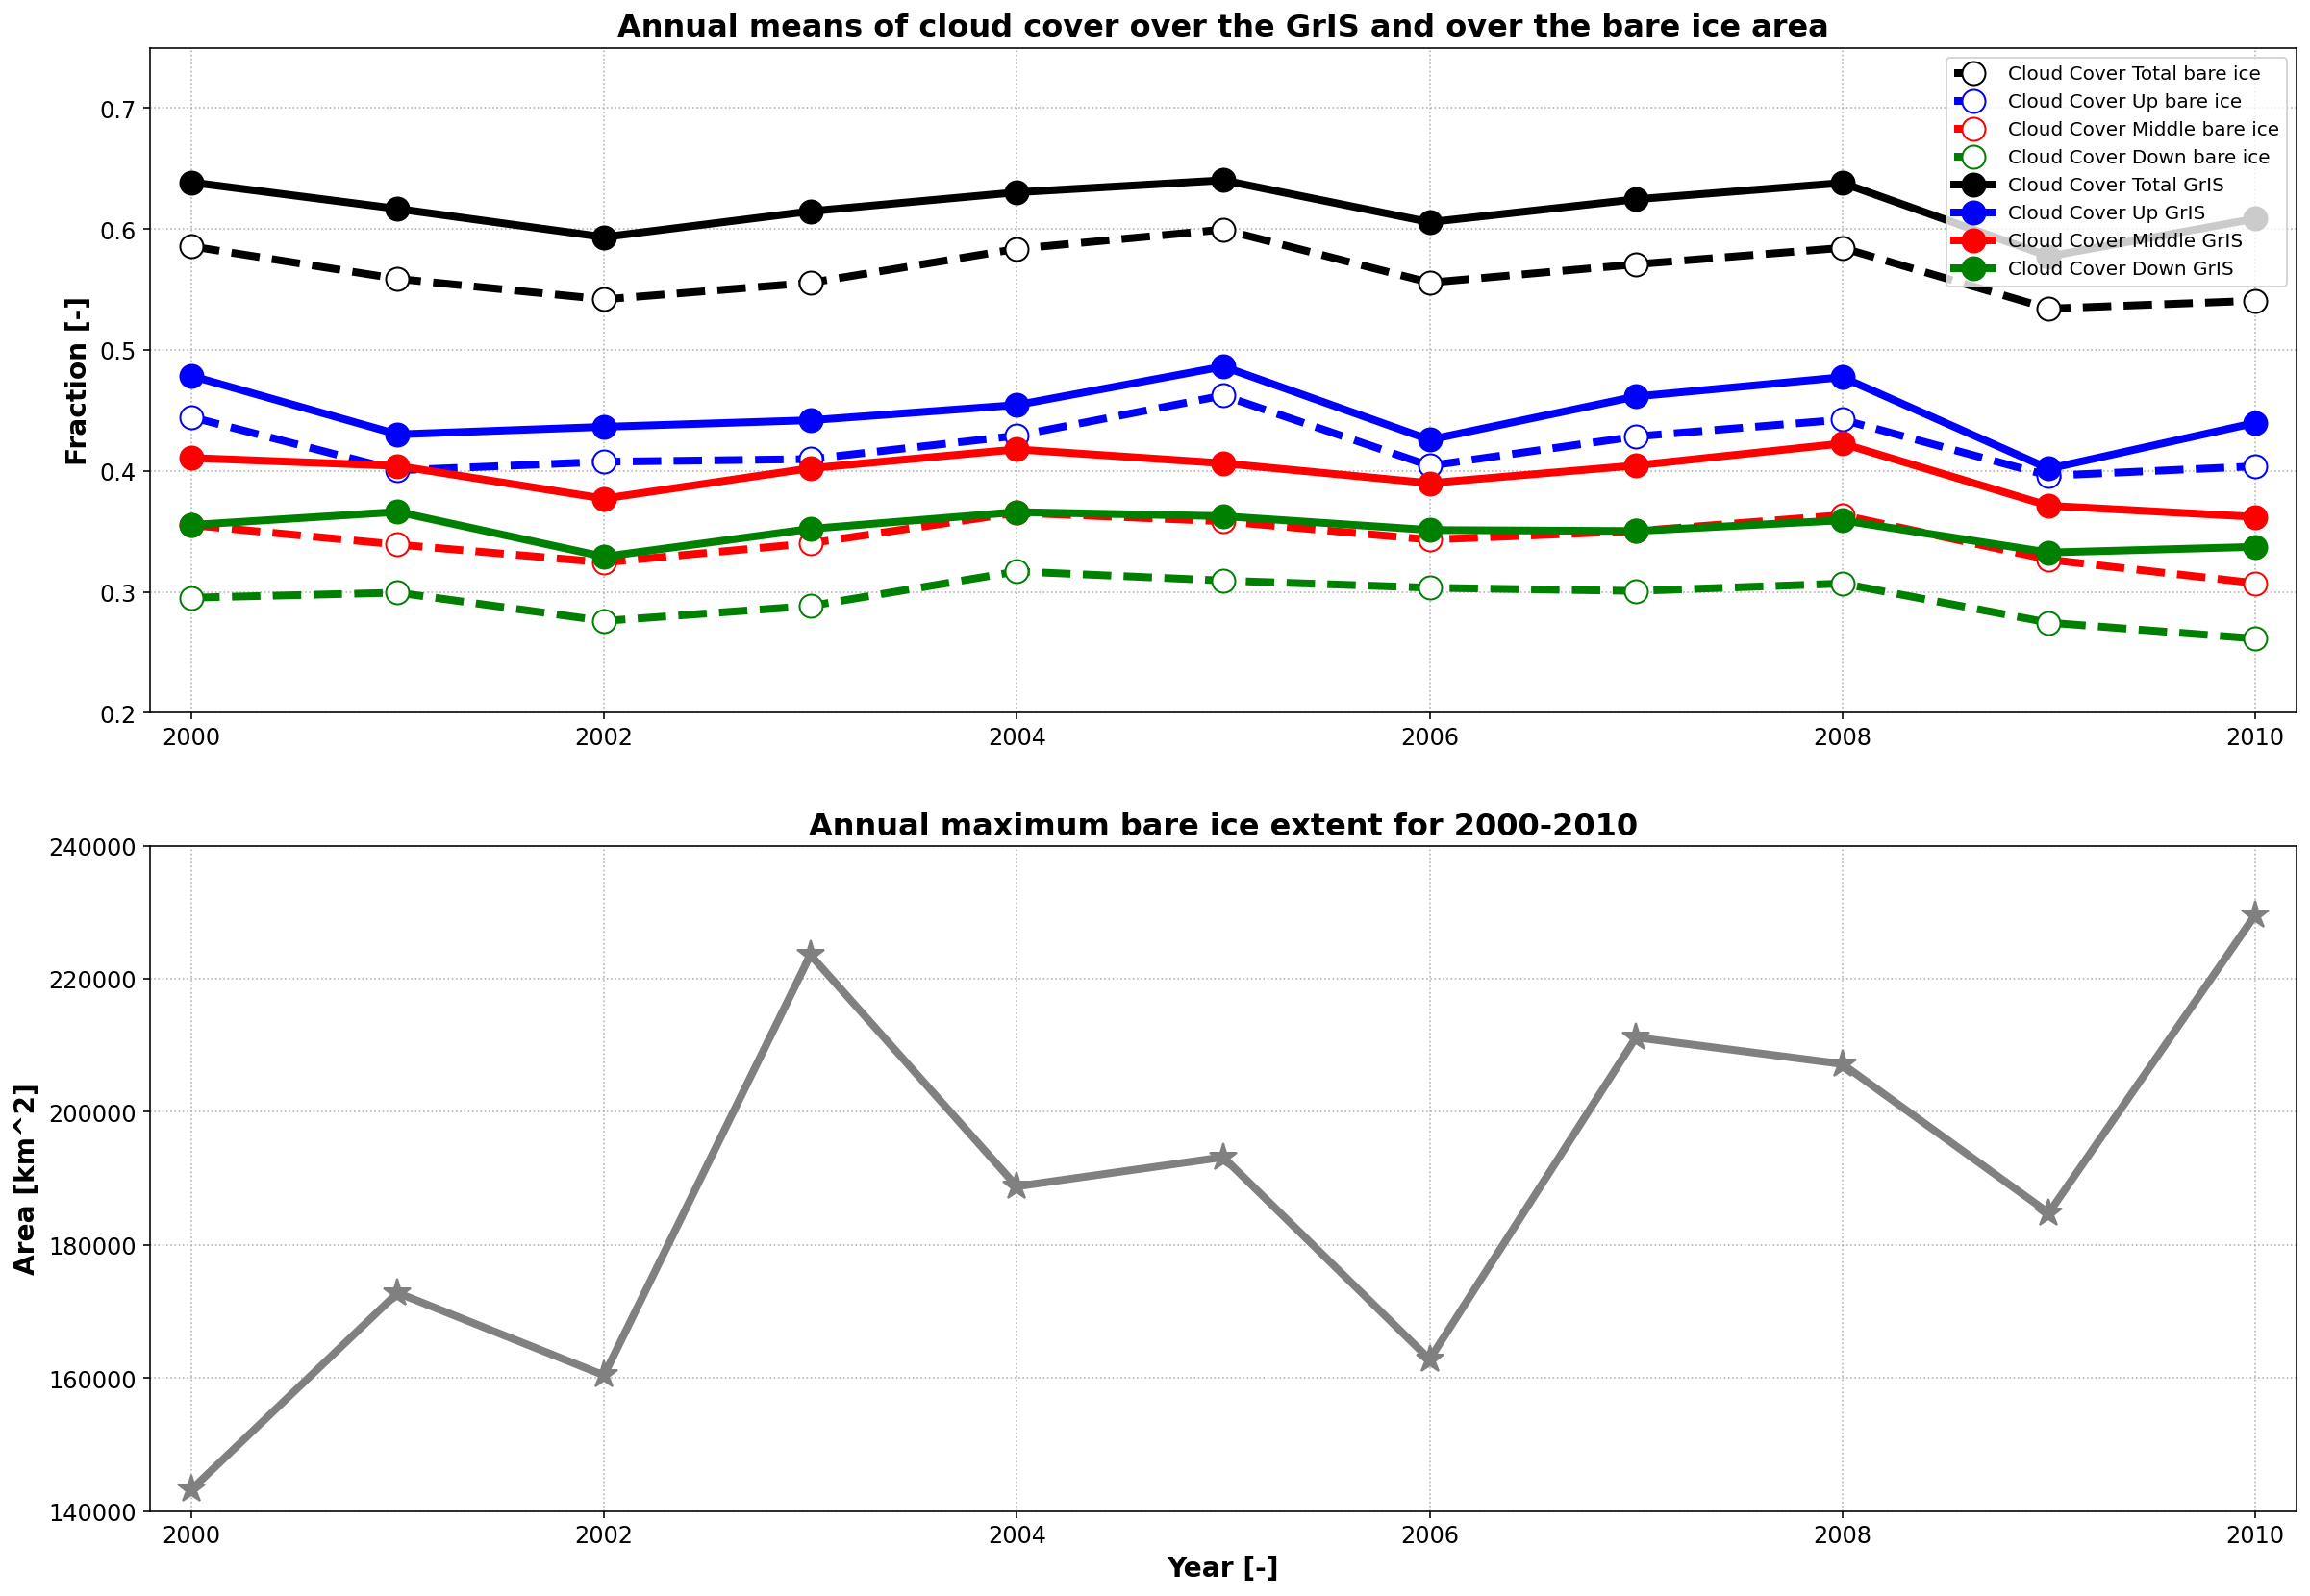

In [471]:
fig = plt.figure(figsize=(20,14))

ax0 = fig.add_subplot(211)

ax0.plot(np.arange(2000,2011), ds_CC_ambi, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='black', linewidth=4, label='Cloud Cover Total bare ice')
ax0.plot(np.arange(2000,2011), ds_CU_ambi, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='blue', linewidth=4, label='Cloud Cover Up bare ice')
ax0.plot(np.arange(2000,2011), ds_CM_ambi, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='red', linewidth=4, label='Cloud Cover Middle bare ice')
ax0.plot(np.arange(2000,2011), ds_CD_ambi, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='green', linewidth=4, label='Cloud Cover Down bare ice')
ax0.plot(np.arange(2000,2011), ds_CC_am, marker='o', markerfacecolor='black', markersize=12, color='black', linewidth=4, label='Cloud Cover Total GrIS')
ax0.plot(np.arange(2000,2011), ds_CU_am, marker='o', markerfacecolor='blue', markersize=12, color='blue', linewidth=4, label='Cloud Cover Up GrIS')
ax0.plot(np.arange(2000,2011), ds_CM_am, marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=4, label='Cloud Cover Middle GrIS')
ax0.plot(np.arange(2000,2011), ds_CD_am, marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4, label='Cloud Cover Down GrIS')
ax0.set_xlim([1999.8, 2010.2])
ax0.set_ylim([0.2, 0.75])
ax0.set_xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])
ax0.set_xticklabels(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'], fontsize=12)
ax0.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
ax0.set_yticklabels(['0.2', '0.3', '0.4', '0.5', '0.6', '0.7'], fontsize=12)
ax0.set_ylabel('Fraction [-]', weight='bold', fontsize=14)
ax0.legend(loc='upper right')
ax0.set_title('Annual means of cloud cover over the GrIS and over the bare ice area', weight='bold', fontsize=16)
ax0.grid(linestyle=':')

ax1 = fig.add_subplot(212)

ax1.plot(np.arange(2000,2011), np.nansum(np.nansum(bi_area_y, axis=1)* 20**2, axis=1), marker='*', markerfacecolor='grey', markersize=15, color='grey', linewidth=4, label='Bare ice extent')
ax1.set_xlim([1999.8, 2010.2])
ax1.set_ylim([1.4e5, 2.4e5])
ax1.set_xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])
ax1.set_xticklabels(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'], fontsize=12)
ax1.set_yticks([14e4, 16e4, 18e4, 20e4, 22e4, 24e4])
ax1.set_yticklabels(['140000', '160000', '180000', '200000', '220000', '240000'], fontsize=12)
ax1.set_xlabel('Year [-]', weight='bold', fontsize=14)
ax1.set_ylabel('Area [km$^2$]', weight='bold', fontsize=14)
ax1.set_title('Annual maximum bare ice extent for 2000-2010', weight='bold', fontsize=16)
ax1.grid(linestyle=':')

# Daily means

#### Determine daily cloud cover over GrIS and over bare ice area, averaged over all years

In [236]:
ds_CC_sm = (ds_MSK.CC * GrIS_label).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()
ds_CU_sm = (ds_MSK.CU * GrIS_label).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()
ds_CM_sm = (ds_MSK.CM * GrIS_label).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()
ds_CD_sm = (ds_MSK.CD * GrIS_label).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()

ds_CC_smbi = (ds_MSK.CC * GrIS_label * bi_area).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()
ds_CU_smbi = (ds_MSK.CU * GrIS_label * bi_area).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()
ds_CM_smbi = (ds_MSK.CM * GrIS_label * bi_area).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()
ds_CD_smbi = (ds_MSK.CD * GrIS_label * bi_area).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()

#### Determine daily bare ice extent, averaged over all years

In [513]:
bi_day = np.zeros((366,1))
leapyearstartdays = np.array([0,1461,2922])

# First 60 days are the same for each year
for i in np.arange(0,59):
    bi_day[i,0] = np.nanmean(np.nansum(np.nansum(s[yearlist[:-1] + i, :,:], axis=1), axis=1))
    
# February 29th for the leap years
bi_day[59,0] = np.nanmean(np.nansum(np.nansum(s[leapyearstartdays + i, :,:], axis=1), axis=1))

# March-December for the non-leap years
for i in np.arange(59,365):
    bi_day[i+1,0] = np.nanmean(np.nansum(np.nansum(s[yearlist[[1,2,3,5,6,7,9,10]] + i, :,:], axis=1), axis=1))

# # March-December for the leap years
for i in np.arange(60,366):
    bi_day[i,0] = ((bi_day[i,0] * 8) + (np.nanmean(np.nansum(np.nansum(s[leapyearstartdays + i, :,:], axis=1), axis=1)) * 3)) / 11

bi_day_km2 = bi_day * 20**2

#### Plot daily cloud cover (total, up, middle and down) over the GrIS and over the bare ice extent, averaged over all years. Also plot daily bare ice extent, averaged over all years

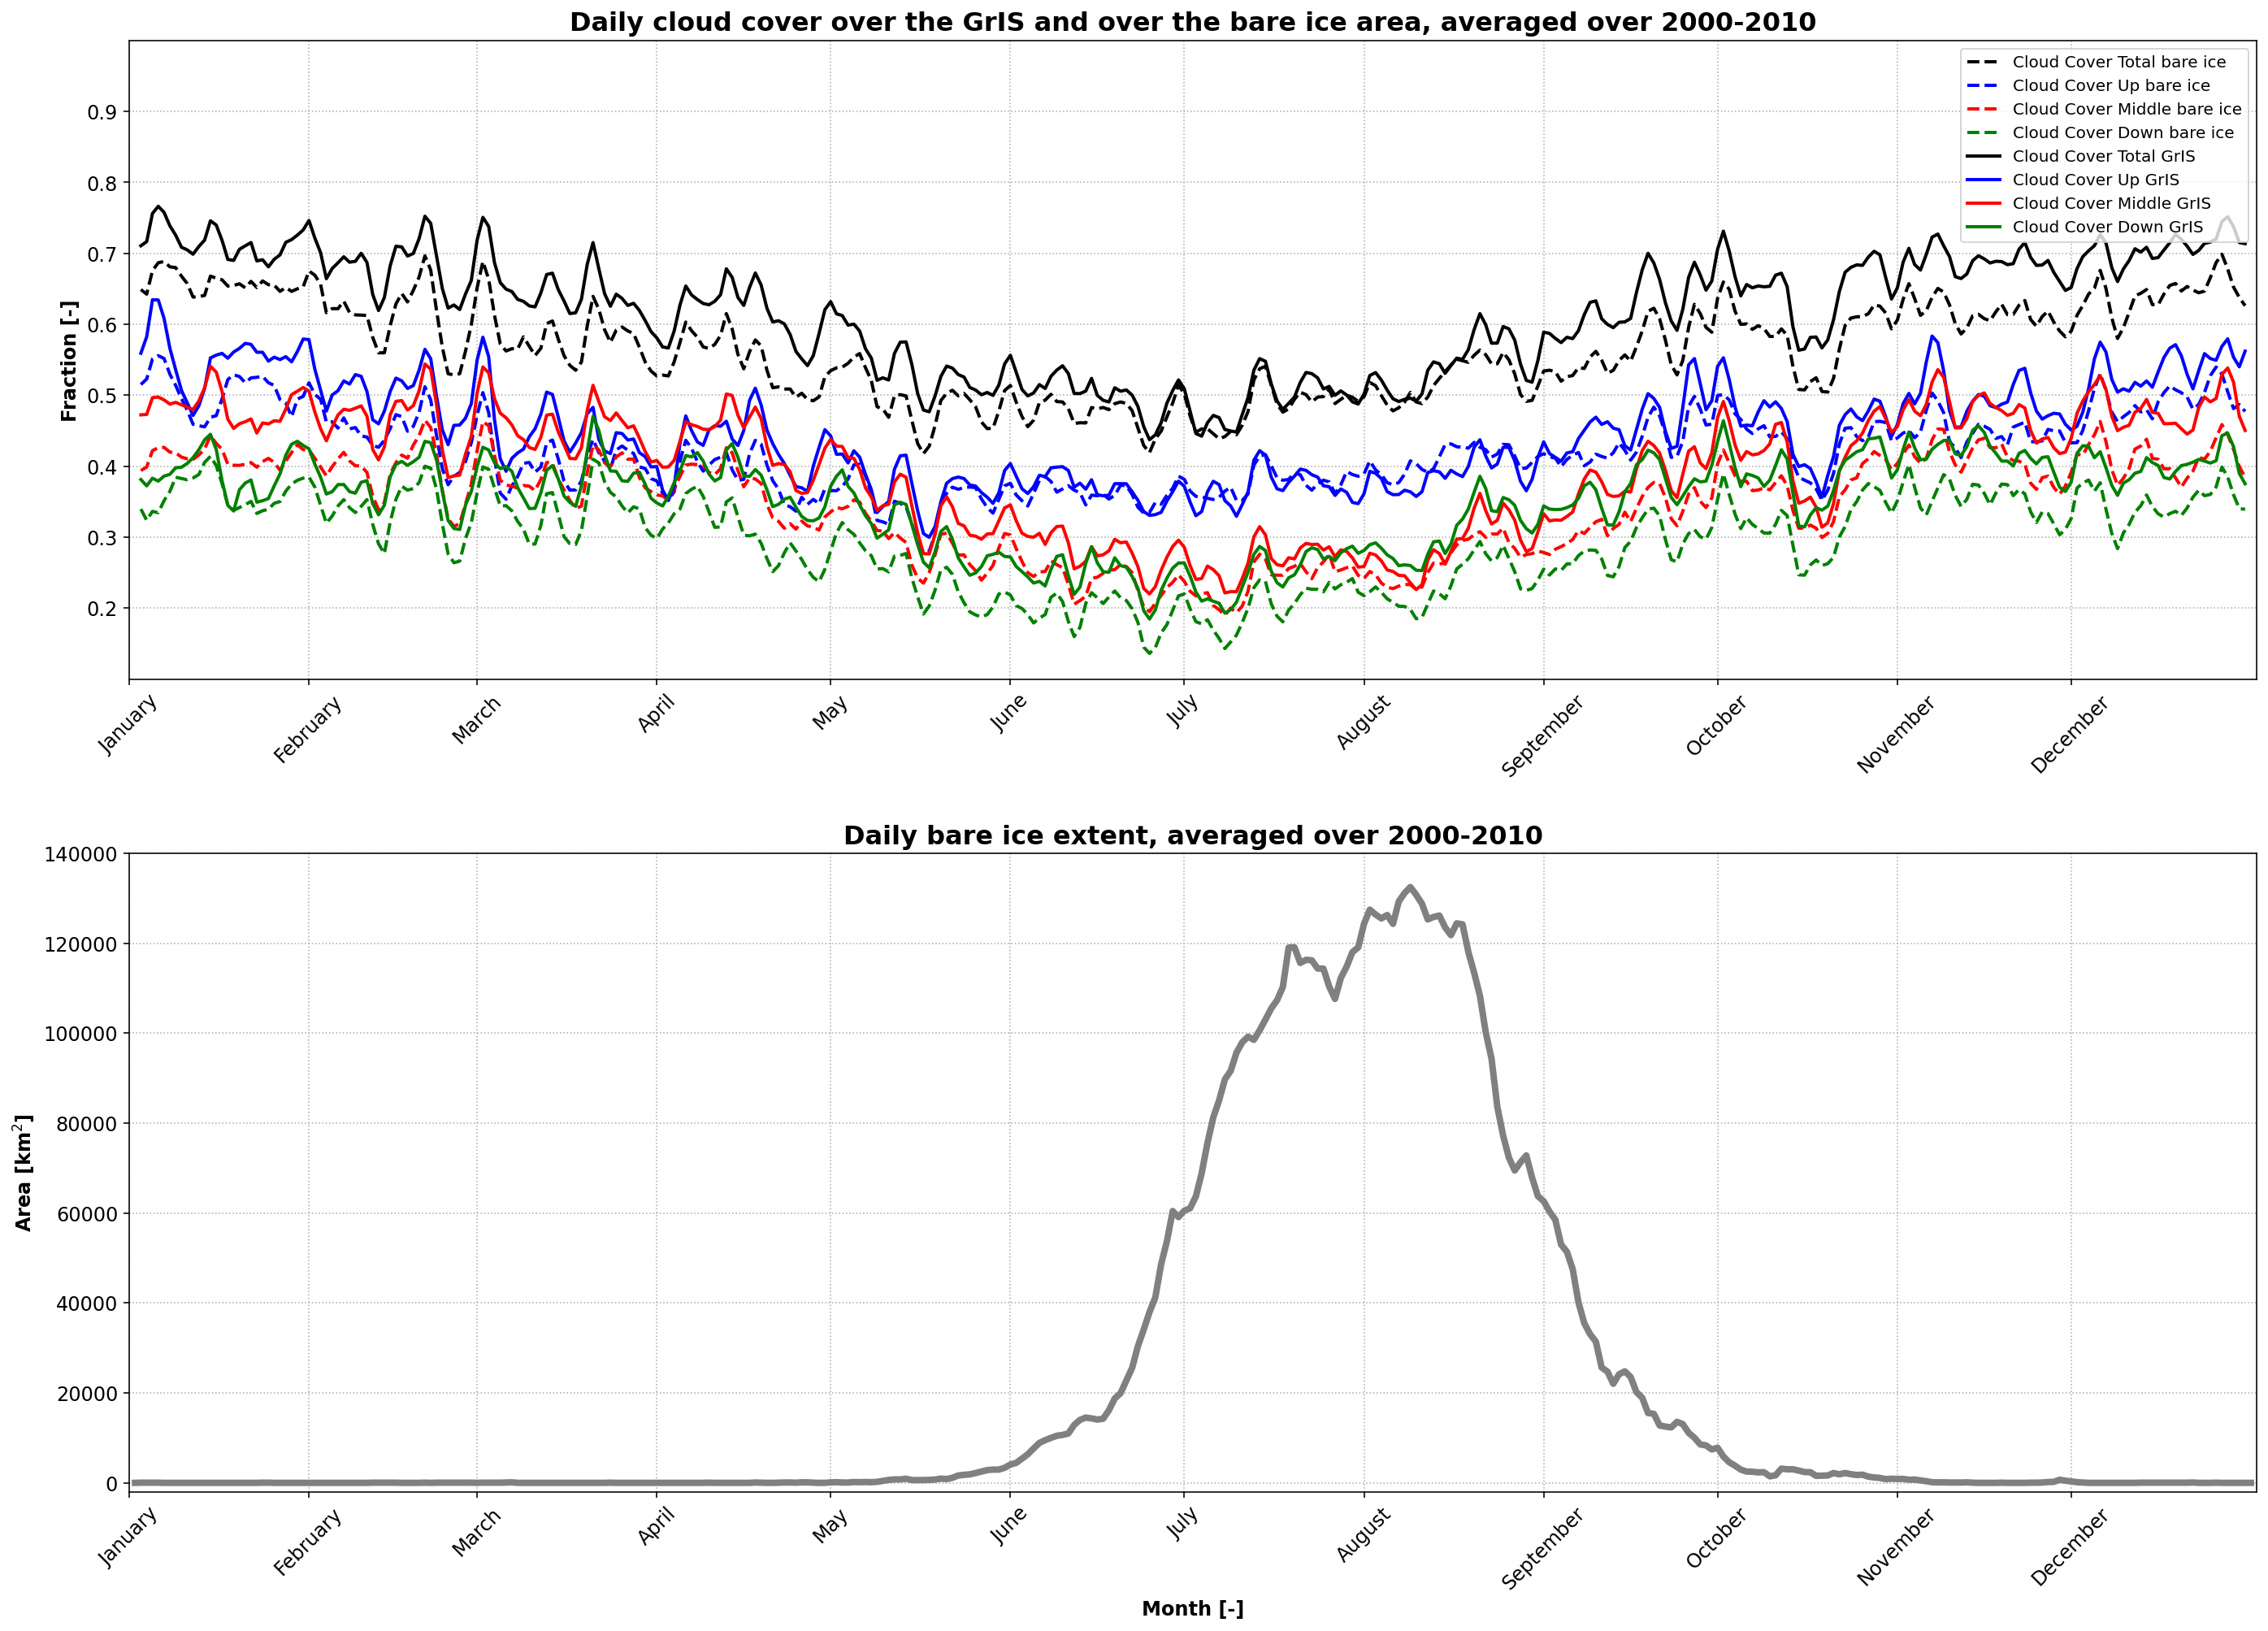

In [682]:
fig = plt.figure(figsize=(20,14))

ax0 = fig.add_subplot(211)

ax0.plot(np.arange(1,367), ds_CC_smbi, color='black', linestyle='--', linewidth=2, label='Cloud Cover Total bare ice')
ax0.plot(np.arange(1,367), ds_CU_smbi, color='blue', linestyle='--', linewidth=2, label='Cloud Cover Up bare ice')
ax0.plot(np.arange(1,367), ds_CM_smbi, color='red', linestyle='--', linewidth=2, label='Cloud Cover Middle bare ice')
ax0.plot(np.arange(1,367), ds_CD_smbi, color='green', linestyle='--', linewidth=2, label='Cloud Cover Down bare ice')
ax0.plot(np.arange(1,367), ds_CC_sm, color='black', linewidth=2, label='Cloud Cover Total GrIS')
ax0.plot(np.arange(1,367), ds_CU_sm, color='blue', linewidth=2, label='Cloud Cover Up GrIS')
ax0.plot(np.arange(1,367), ds_CM_sm, color='red', linewidth=2, label='Cloud Cover Middle GrIS')
ax0.plot(np.arange(1,367), ds_CD_sm, color='green', linewidth=2, label='Cloud Cover Down GrIS')
ax0.set_xlim([0, 367])
ax0.set_ylim([0.1, 1.0])
ax0.set_xticks([0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335])
ax0.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45, fontsize=12)
ax0.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax0.set_yticklabels(['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'], fontsize=12)
ax0.set_ylabel('Fraction [-]', weight='bold', fontsize=12)
ax0.legend(loc='upper right')
ax0.set_title('Daily cloud cover over the GrIS and over the bare ice area, averaged over 2000-2010', weight='bold', fontsize=16)
ax0.grid(linestyle=':')

ax1 = fig.add_subplot(212)
fig.tight_layout(pad=4)

ax1.plot(np.arange(1,367), bi_day_km2, color='grey', linewidth=4, label='Bare ice extent')
ax1.set_xlim([0, 367])
ax1.set_ylim([-2e3, 14e4])
ax1.set_xticks([0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335])
ax1.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45, fontsize=12)
ax1.set_yticks([0, 2e4, 4e4, 6e4, 8e4, 10e4, 12e4, 14e4])
ax1.set_yticklabels(['0', '20000', '40000', '60000', '80000', '100000', '120000', '140000'], fontsize=12)
ax1.set_xlabel('Month [-]', weight='bold', fontsize=12)
ax1.set_ylabel('Area [km$^2$]', weight='bold', fontsize=12)
ax1.set_title('Daily bare ice extent, averaged over 2000-2010', weight='bold', fontsize=16)
ax1.grid(linestyle=':')

# Linear regression

#### Calculate linear regression between daily bare ice extent and total cloud cover over GrIS and over bare ice extent. Only include June, July, August and September. There is almost no bare ice in the other months

#### Initialize linear regression models

In [545]:
model_GrIS = LinearRegression().fit(bi_day_km2[152:305], ds_CC_sm[152:305])
model_bi = LinearRegression().fit(bi_day_km2[152:305], ds_CC_smbi[152:305])

#### Calculate R$^2$-values

In [546]:
r_sq_GrIS = model.score(bi_day_km2[152:305], ds_CC_sm[152:305])
r_sq_bi = model.score(bi_day_km2[152:305], ds_CC_smbi[152:305])

(0.3087431890074118, -0.4856748118235521)

#### Calculate linear fits

In [549]:
y_pred_GrIS = model_GrIS.predict(bi_day_km2[152:305])
y_pred_bi = model_bi.predict(bi_day_km2[152:305])

#### Create colors

In [631]:
col_dums = np.sort(ds_CC_sm[152:305] - y_pred_GrIS)
col_column = col_dums - np.min(col_dums)
my_colors1 = np.array([0.5, (1/(np.max(col_dums) - np.min(col_dums))), (1/(np.max(col_dums) - np.min(col_dums)))/2]) * np.transpose(np.array([col_column,]))

#### Plot linear regressions of bare ice extent with cloud cover fraction over GrIS and cloud cover fraction over the bare ice extent for each day in June, July, August and September, averaged over 2000-2010. Lighter colors indicate days earlier in the season, so closer to June. Darker colors indicate days later in the season, so closer to September

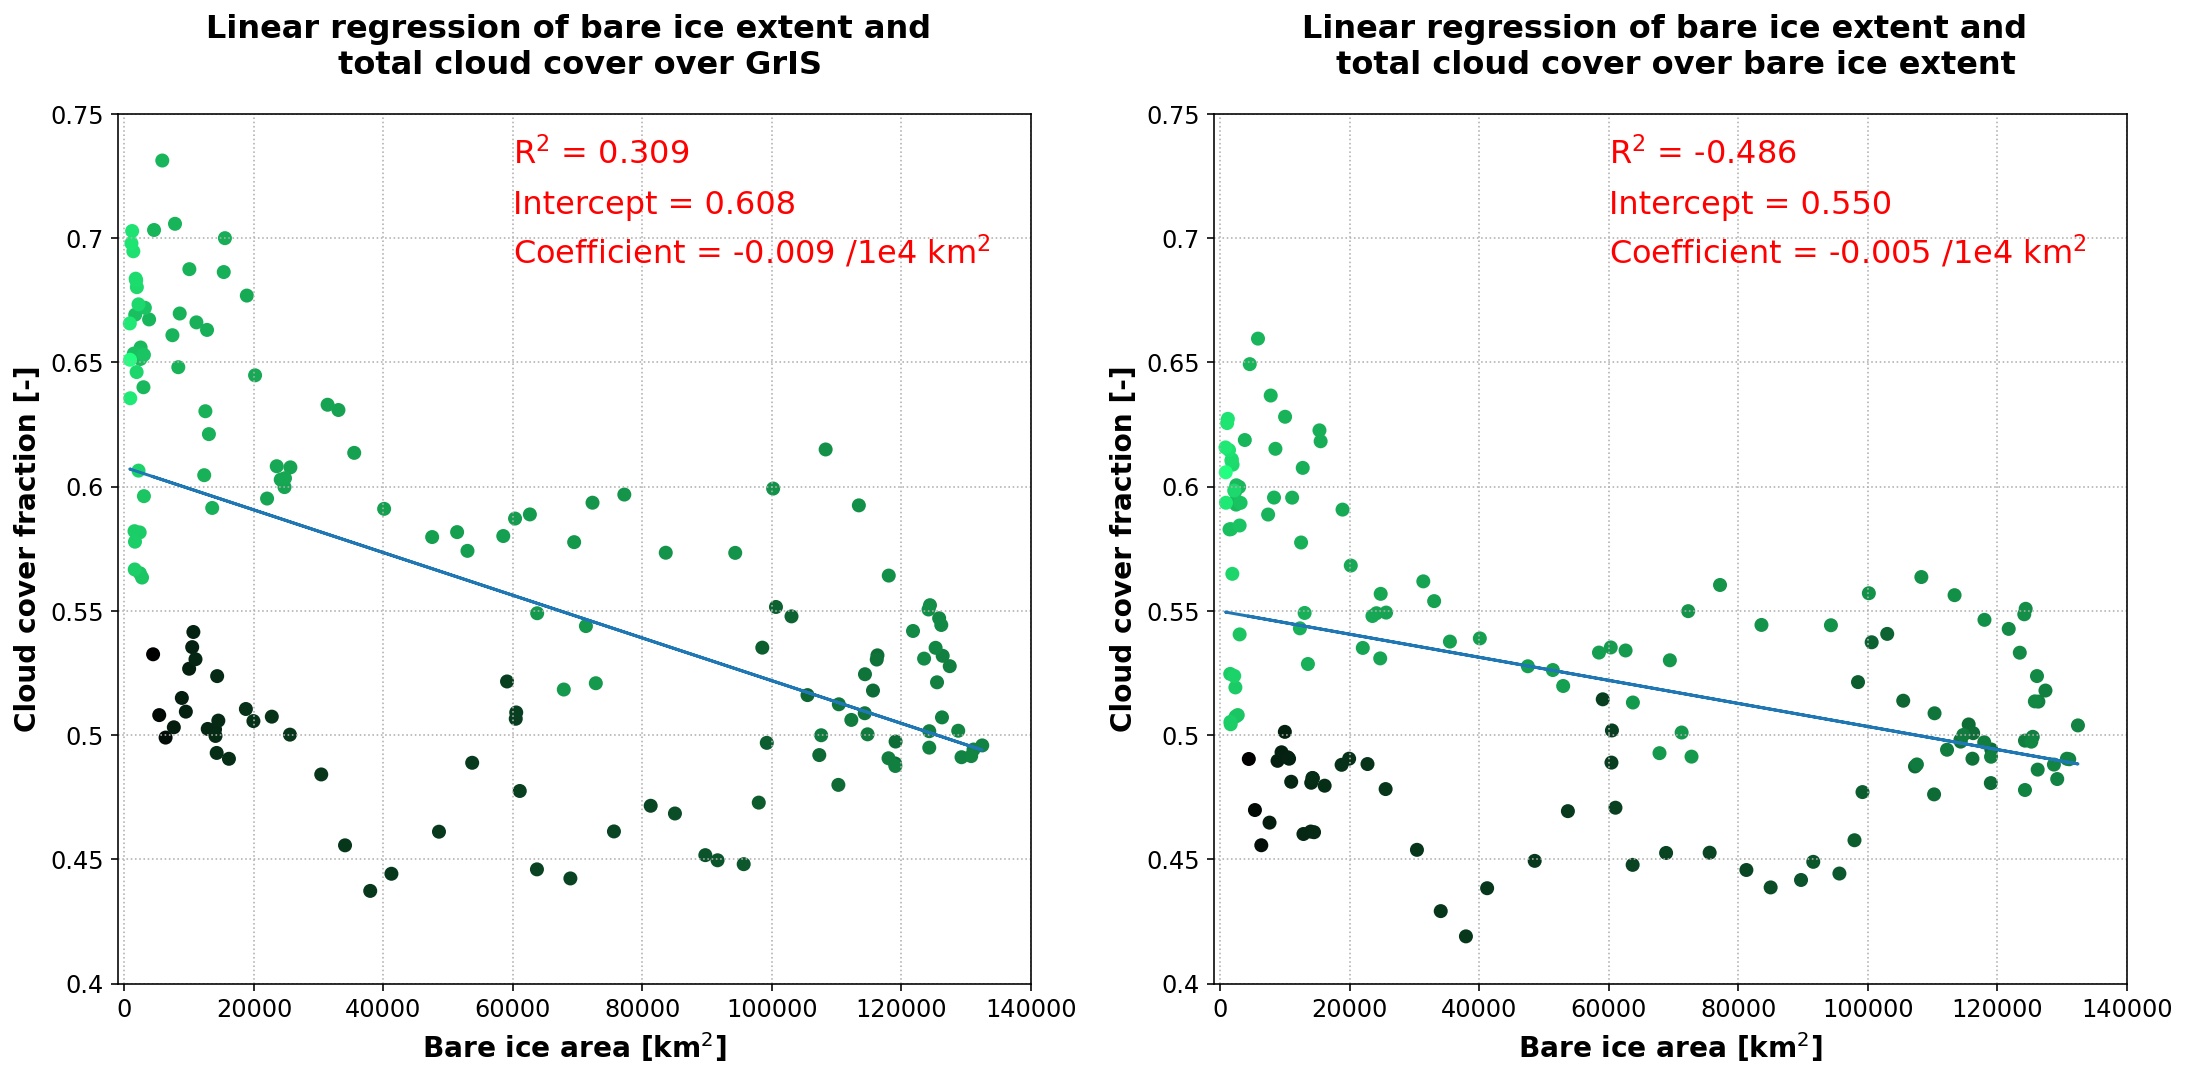

In [683]:
fig = plt.figure(figsize=(18,8))

ax0 = fig.add_subplot(121)

ax0.scatter(bi_day_km2[152:305], ds_CC_sm[152:305],  c=my_colors1)
ax0.plot(bi_day_km2[152:305], y_pred_GrIS)
ax0.text(60000, 0.73, 'R$^2$ = %.3f' % (r_sq_GrIS), fontsize=16, color='red')
ax0.text(60000, 0.71, 'Intercept = %.3f' % (model_GrIS.intercept_), fontsize=16, color='red')
ax0.text(60000, 0.69, 'Coefficient = %.3f /1e4 km$^2$' % (model_GrIS.coef_ * 10000), fontsize=16, color='red')

ax0.set_xlim([-1000, 140000])
ax0.set_ylim([0.4, 0.75])
ax0.set_xticks([0, 2e4, 4e4, 6e4, 8e4, 10e4, 12e4, 14e4])
ax0.set_xticklabels(['0', '20000', '40000', '60000', '80000', '100000', '120000', '140000'], fontsize=12)
ax0.set_yticks([0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75])
ax0.set_yticklabels(['0.4', '0.45', '0.5', '0.55', '0.6', '0.65', '0.7', '0.75'], fontsize=12)
ax0.set_xlabel('Bare ice area [km$^2$]', weight='bold', fontsize=14)
ax0.set_ylabel('Cloud cover fraction [-]', weight='bold', fontsize=14)
ax0.set_title('Linear regression of bare ice extent and \n total cloud cover over GrIS', weight='bold', fontsize=16, pad=20)
ax0.grid(linestyle=':')

ax1 = fig.add_subplot(122)

ax1.scatter(bi_day_km2[152:305], ds_CC_smbi[152:305],  c=my_colors1)
ax1.plot(bi_day_km2[152:305], y_pred_bi)
ax1.text(60000, 0.73, 'R$^2$ = %.3f' % (r_sq_bi), fontsize=16, color='red')
ax1.text(60000, 0.71, 'Intercept = %.3f' % (model_bi.intercept_), fontsize=16, color='red')
ax1.text(60000, 0.69, 'Coefficient = %.3f /1e4 km$^2$' % (model_bi.coef_ * 10000), fontsize=16, color='red')

ax1.set_xlim([-1000, 140000])
ax1.set_ylim([0.4, 0.75])
ax1.set_xticks([0, 2e4, 4e4, 6e4, 8e4, 10e4, 12e4, 14e4])
ax1.set_xticklabels(['0', '20000', '40000', '60000', '80000', '100000', '120000', '140000'], fontsize=12)
ax1.set_yticks([0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75])
ax1.set_yticklabels(['0.4', '0.45', '0.5', '0.55', '0.6', '0.65', '0.7', '0.75'], fontsize=12)
ax1.set_xlabel('Bare ice area [km$^2$]', weight='bold', fontsize=14)
ax1.set_ylabel('Cloud cover fraction [-]', weight='bold', fontsize=14)
ax1.set_title('Linear regression of bare ice extent and \n total cloud cover over bare ice extent', weight='bold', fontsize=16, pad=20)
ax1.grid(linestyle=':')